In [20]:
# import needed package
import random
from load_data import *
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import *
%matplotlib inline

In [9]:
def extract_wifi_rssi(wifi_data):
    wifi_rssi = {}
    for position_key in wifi_data:
        wifi_ds = wifi_data[position_key]['wifi']
        for wifi_d in wifi_ds:
            bssid = wifi_d[1]
            rssi = int(wifi_d[2])

            if bssid in wifi_rssi:
                position_rssi = wifi_rssi[bssid]
                if position_key in position_rssi:
                    rssi = position_rssi[position_key][0]
                    wifi_count = position_rssi[position_key][1]
                    position_rssi[position_key][0] = (rssi * (wifi_count + 1)) / (wifi_count + 1)
                    position_rssi[position_key][1] += 1
                else:
                    position_rssi[position_key] = [rssi, 1]
            else:
                position_rssi = {position_key: [rssi, 1]}

            wifi_rssi[bssid] = position_rssi

    return wifi_rssi

In [12]:
def visualize_heatmap(position, value, floor_plan_file, width, height, colorbar_title, save_path, save_name, title=None,
                      show=False):
    # configure
    fig, ax = plt.subplots()
    font_dict = {'fontsize': 14,
                 'fontweight': 8.2,
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'}
    plt.title(title, fontdict=font_dict, loc='left')

    # add floor plan
    img = plt.imread(floor_plan_file)
    ax.imshow(img, extent=(0, width, 0, height))

    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

    plt.scatter(
        x=position[:, 0],
        y=position[:, 1],
        c=value,
        cmap='gist_rainbow_r',
        s=10
    )
    plt.colorbar(label=colorbar_title, orientation='horizontal')

    plt.savefig(os.path.join(save_path, save_name), format='PNG', dpi=160)

    if show:
        plt.show()

In [13]:
def vis_wifi(site, floor, select_random=True):
    print('Processing wifi rssi on floor', floor, 'in', site)
    file_path = os.path.join('../data/', site, floor)
    floor_info_path = os.path.join(file_path, 'floor_info.json')
    floor_image_path = os.path.join(file_path, 'floor_image.png')

    with open(floor_info_path) as floor_info_file:
        map_info = json.load(floor_info_file)['map_info']

    map_height = map_info['height']
    map_width = map_info['width']

    path_data_files = os.path.join(file_path, 'path_data_files')
    wifi_data = combine_data_with_position(path_data_files)
    wifi_rssi = extract_wifi_rssi(wifi_data)
    if select_random:
        target_wifi = random.choice(list(wifi_rssi.keys()))
        print("The chosen wifi ap bssid is:", target_wifi)
    else:
        print('There are 10 example wifi ap bssid:')
        for _ in range(0, 10):
            print(random.choice(list(wifi_rssi.keys())))
        target_wifi = input(f"Please input target wifi ap bssid:\n")
    position = np.array(list(wifi_rssi[target_wifi].keys()))
    values = np.array(list(wifi_rssi[target_wifi].values()))[:, 0]
    visualize_heatmap(position, values, floor_image_path, map_width, map_height, colorbar_title='wifi_rssi',
                      save_path='../out/wifi_rssi', save_name=f'{target_wifi.replace(":", "-")}.png',
                      title=f'Wifi: {target_wifi} RSSI', show=True)

Processing wifi rssi on floor F1 in site1
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7aac5b77e0006b1732b.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7abc5b77e0006b1732d.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7b29191710006b5705b.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7b7c5b77e0006b1732f.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7ba9191710006b5705d.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7bdc5b77e0006b17331.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd9e7bf9191710006b5705f.txt
Processing file: E:\course\urban_computing\assignment\project_1\data\site1\F1\path_data_files\5dd

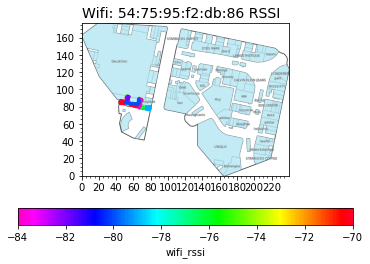

In [21]:
vis_wifi('site1', 'F1', True)